In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.transforms as mtransforms
from pathlib import Path

plt.rc('text', usetex=True)
plt.rc('font', size=14)

In [3]:
def adams_quantum_walk_data(n):
    return np.genfromtxt('./../Max2SAT_quantum/qw_and_aqc_data/heug.csv', delimiter=',', skip_header=1, dtype=str)[(n-5)*10000:(n-4)*10000, 2].astype(float)


def quantum_walk_data(n):
    probs = np.loadtxt(Path("./../Max2SAT_quantum/inf_time_probs/just_probs/inf_time_probs_n_" + str(n) + ".txt"))
    return probs


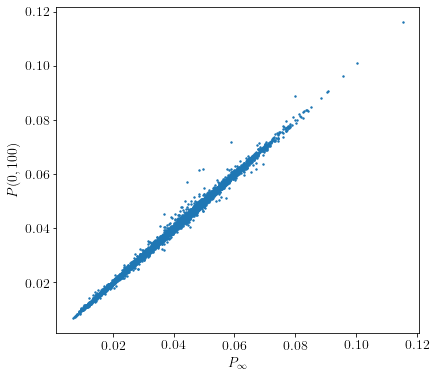

In [39]:
n=11
p_infty = quantum_walk_data(n)
p100 = adams_quantum_walk_data(n)


fig = plt.figure(figsize=(6.5, 6))
plt.scatter(p_infty, p100, s=2, alpha=1)
plt.xlabel(r"$P_\infty$")
plt.ylabel(r"$P(0, 100)$")
plt.show()

max: 883.0


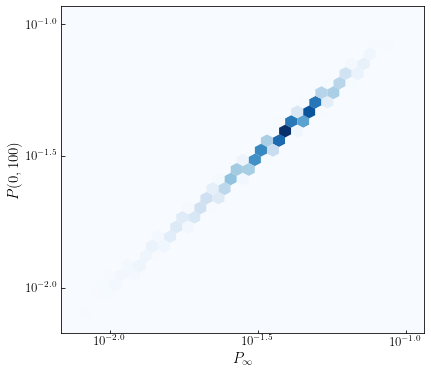

In [42]:
n=11
p_infty = quantum_walk_data(n)
p100 = adams_quantum_walk_data(n)


fig = plt.figure(figsize=(6.5, 6))

hex = plt.hexbin(np.log10(p_infty), np.log10(p100), gridsize=30, cmap='Blues', vmax=883, linewidths=0.05)
vals = hex.get_array()
print('max:', np.max(vals))
centres = hex.get_offsets()
x_min, x_max = np.min(centres[:, 0]), np.max(centres[:, 0])
y_min, y_max = np.min(centres[:, 1]), np.max(centres[:, 1])

# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=13, size=5)
plt.xlabel(r'$\overline{P}(0, 100)$', fontsize=15)
plt.ylabel(r'$N_\mathrm{calls}$', fontsize=15)
xt = np.arange(-2, -0.5, 0.5)
xtl = ['$10^{' + f'{x}' + '}$' for x in xt]
plt.xticks(xt, xtl, fontsize=13)
yt = np.arange(-2, -0.5, 0.5)
ytl = ['$10^{' + f'{y}' + '}$' for y in yt]
plt.yticks(yt, ytl, fontsize=13)
plt.tick_params(direction='in')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel(r"$P_\infty$")
plt.ylabel(r"$P(0, 100)$")

plt.show()

max: 884.0
n=11: m=0.9999316689016143pm0.0004809678407076125, c=1.491488605620539e-06pm0.0007001273255634936, SR=0.9986490214836401


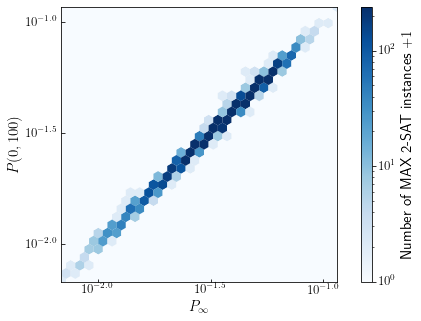

In [50]:
plt.rc('text', usetex=True)
plt.rc('font', size=14)
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

blue = '#0072B2'
orange = '#EF6900'
green = '#009E73'

n=11
p_infty = quantum_walk_data(n)
p100 = adams_quantum_walk_data(n)

fig = plt.figure(figsize=(6, 5.05))
axs = []
gs1 = gridspec.GridSpec(1, 3, width_ratios=[1, 0.04, 0.0])
gs1.update(wspace=0.25)

axs.append(plt.subplot(gs1[0]))
hex = plt.hexbin(np.log10(p_infty), np.log10(p100), gridsize=30, cmap='Blues', norm=LogNorm(vmax=239), linewidths=0.05)
vals = hex.get_array()
print('max:', np.max(vals))
centres = hex.get_offsets()
x_min, x_max = np.min(centres[:, 0]), np.max(centres[:, 0])
y_min, y_max = np.min(centres[:, 1]), np.max(centres[:, 1])

plt.xlabel(r"$P_\infty$", fontsize=15)
plt.ylabel(r"$P(0, 100)$", fontsize=15)
xt = np.arange(-2, -0.5, 0.5)
xtl = ['$10^{' + f'{x}' + '}$' for x in xt]
plt.xticks(xt, xtl, fontsize=13)
yt = np.arange(-2, -0.5, 0.5)
ytl = ['$10^{' + f'{y}' + '}$' for y in yt]
plt.yticks(yt, ytl, fontsize=13)
plt.tick_params(direction='in', axis='both', labelsize=13)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

xr_tmp, yr_tmp = np.argsort(np.log10(p_infty)), np.argsort(np.log10(p100))
xr, yr = np.empty_like(xr_tmp), np.empty_like(yr_tmp)
xr[xr_tmp], yr[yr_tmp] = np.arange(len(p_infty)), np.arange(len(p100))
covr = np.cov(xr, yr)
sr = covr[1, 0]/(np.std(xr)*np.std(yr))

line = lambda x, m, c: (x*m)+c
par, cov = curve_fit(line, np.log10(p_infty), np.log10(p100))
m, c = (par[0], np.sqrt(cov[0, 0])), (par[1], np.sqrt(cov[1, 1]))
print(f'n={n}: m={m[0]}pm{m[1]}, c={c[0]}pm{c[1]}, SR={sr}')
fy = np.array([line(xval, m[0], c[0]) for xval in np.log10(p_infty)])

ax = fig.add_subplot(gs1[:, 1])
cb = plt.colorbar(hex, cax=ax, use_gridspec=True)
cb.ax.tick_params(labelsize=13)
cb.set_label(r'Number of MAX 2-SAT instances $+1$', fontsize=15)

# plt.savefig('finite_infinite_time_p_hexbin_windows.pdf', bbox_inches='tight')

plt.show()